In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#reading data
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/PDS project/raw_data/raw_data.csv')
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#dropping the columns that are not useful for the analysis
ndf=df.copy()
ndf.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
ndf.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
ndf.Gender.replace(['Male','Female'],['1','0'],inplace=True)
ndf['Gender']=pd.to_numeric(ndf['Gender'])
ndf.Geography.replace(['France','Spain','Germany'],['0','1','2'],inplace=True)
ndf['Geography']=pd.to_numeric(ndf['Geography'])
ndf.dtypes


CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

[]

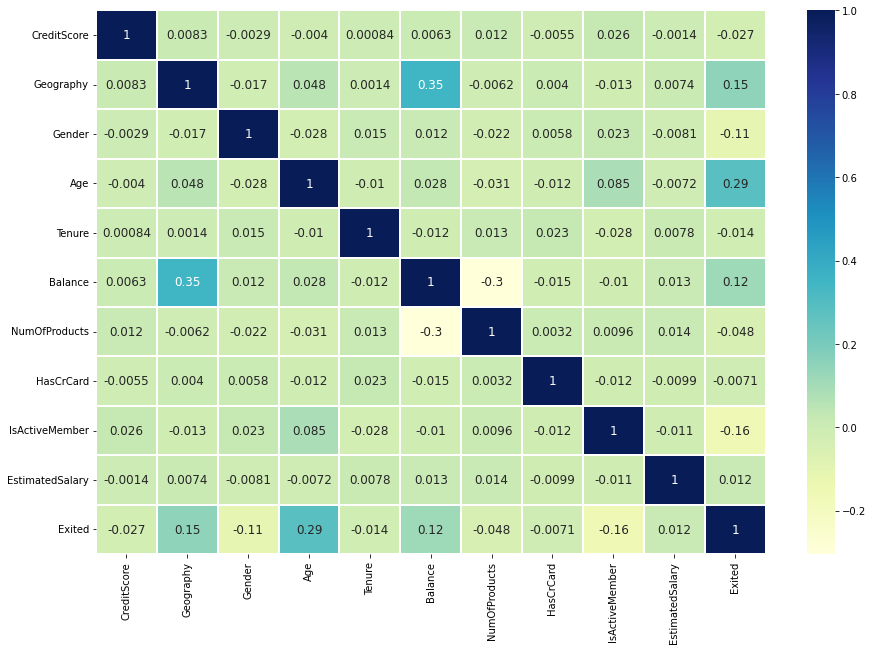

In [ ]:
#heatmap of correlation for the continuous variables
import matplotlib.pyplot as mp
import seaborn as sb
fig,ax=mp.subplots(figsize=(15,10))
dp=sb.heatmap(ndf.corr(), cmap="YlGnBu", annot=True, linewidths=1, annot_kws={'size': 12})
mp.plot()

In [ ]:
#from scipy.stats import pearsonr
#r,_=pearsonr(ndf.HasCrCard,ndf.Exited)
#print('Pearsons correlation: %.3f' % r)

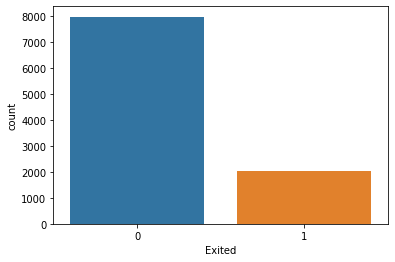

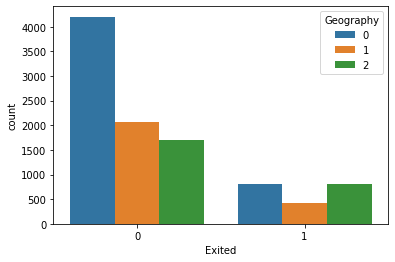

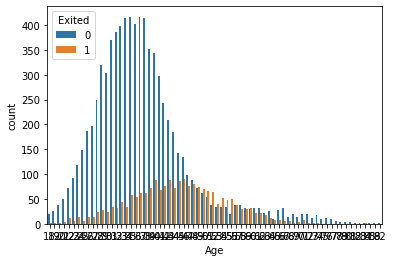

In [ ]:
#plotting the significantt variables
sb.countplot(x='Exited',data=ndf)
mp.show()
sb.countplot(x='Exited',hue='Geography',data=ndf)
mp.show()
sb.countplot(x='Age',hue='Exited',data=ndf)
mp.show()


In [ ]:
#removing the least significant columns from the data
z=ndf.copy()
#z.drop(['CreditScore','Tenure','NumOfProducts','HasCrCard','EstimatedSalary'],axis=1,inplace=True)
z

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#z=df.astype({'Exited':'string'})
#z.Exited.replace('1','yes',inplace=True)
#z.Exited.replace('0','no',inplace=True)
z
"""cnt=0
for i in range(len(z)):
  if z.loc[i,'Exited']==0:
    z.drop(index=i,inplace=True)
    cnt+=1
  if cnt==6000:
    break
sb.countplot(x='Exited',data=z)
mp.show()"""


"cnt=0\nfor i in range(len(z)):\n  if z.loc[i,'Exited']==0:\n    z.drop(index=i,inplace=True)\n    cnt+=1\n  if cnt==6000:\n    break\nsb.countplot(x='Exited',data=z)\nmp.show()"

In [ ]:
z.Exited.nunique()
z.shape

(10000, 11)

In [ ]:
#creating training and testing data
from sklearn.model_selection import train_test_split
y_data=z['Exited']
x_data=z.drop('Exited',axis=1)
x_training_data,x_test_data,y_training_data,y_test_data=train_test_split(x_data,y_data,test_size=0.3)

In [ ]:
#Training Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_training_data,y_training_data)
predict=model.predict(x_test_data)

In [ ]:
#measuring the performance of model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data,predict))
print(confusion_matrix(y_test_data,predict))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      2354
           1       0.38      0.05      0.09       646

    accuracy                           0.78      3000
   macro avg       0.59      0.51      0.48      3000
weighted avg       0.70      0.78      0.70      3000

[[2301   53]
 [ 613   33]]
